This week we look at using an autoencoder to reduce our data dimensions before feeding it to our LGBM model

In [1]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
import tensorflow.keras as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.layers import Dense,LeakyReLU,BatchNormalization,Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'lightgbm'

In [3]:
try:
    train_data=pd.read_csv('../data/numerai_dataset_252/numerai_training_data.csv').set_index('id')
    test_data=pd.read_csv('../data/numerai_dataset_252/numerai_tournament_data.csv').set_index('id')
except Exception as e:
    num_api = numerapi.NumerAPI(public_key, secret_key,verbosity="info")
    num_api.download_current_dataset(dest_path='../data/')

In [81]:
feature_names = [f for f in train_data if 'feature' in f]

In [110]:
x_train=train_data[feature_names][:10000]
x_test=test_data[feature_names][:10000]

#### Lets define autoencoder model

In [111]:
OPT = Adam()
LOSS = mse

In [112]:
class AutoEncoder():
    def __init__(self, f_dims, new_dims):
        self.f_dims=f_dims
        self.new_dims=f_dims[1] if new_dims is None else new_dims

        
    def dense_layer(self, x, size=1):
        x = Dense(self.f_dims[1]*size)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        return x

    
    def encoder(self,x):
        e1 = self.dense_layer(x, 2)
        e2 = self.dense_layer(x)
        return e2


    def decoder(self,x):
        d1 = self.dense_layer(x)
        d2 = self.dense_layer(x, 2)
        return d2
        
        
    def build(self):
    
        x_in = Input((self.f_dims[1],))
        
        x = self.encoder(x_in)
        x = Dense(self.new_dims)(x)
        x = self.decoder(x)
        x_out = Dense(self.f_dims[1], activation='linear')(x)
        model = Model(x_in,x_out)
    
        return model

In [113]:
ae=AutoEncoder(x_train.shape,310)
model=ae.build()
model.compile(optimizer=OPT, loss=LOSS)
history=model.fit(x_train, x_train, epochs=200, batch_size=16, verbose=2, validation_data=(x_test,x_test))

310
310
Epoch 1/200
625/625 - 3s - loss: 0.0770 - val_loss: 0.0457
Epoch 2/200
625/625 - 3s - loss: 0.0404 - val_loss: 0.0305
Epoch 3/200
625/625 - 3s - loss: 0.0326 - val_loss: 0.0269
Epoch 4/200
625/625 - 2s - loss: 0.0287 - val_loss: 0.0217
Epoch 5/200
625/625 - 3s - loss: 0.0256 - val_loss: 0.0192
Epoch 6/200
625/625 - 2s - loss: 0.0238 - val_loss: 0.0188
Epoch 7/200
625/625 - 2s - loss: 0.0223 - val_loss: 0.0171
Epoch 8/200
625/625 - 2s - loss: 0.0210 - val_loss: 0.0150
Epoch 9/200
625/625 - 2s - loss: 0.0199 - val_loss: 0.0155
Epoch 10/200
625/625 - 3s - loss: 0.0194 - val_loss: 0.0152
Epoch 11/200
625/625 - 2s - loss: 0.0189 - val_loss: 0.0130
Epoch 12/200
625/625 - 2s - loss: 0.0181 - val_loss: 0.0130
Epoch 13/200
625/625 - 2s - loss: 0.0178 - val_loss: 0.0140
Epoch 14/200
625/625 - 2s - loss: 0.0173 - val_loss: 0.0117
Epoch 15/200
625/625 - 2s - loss: 0.0170 - val_loss: 0.0110
Epoch 16/200
625/625 - 2s - loss: 0.0167 - val_loss: 0.0106
Epoch 17/200
625/625 - 2s - loss: 0.0163 

Epoch 137/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0054
Epoch 138/200
625/625 - 3s - loss: 0.0113 - val_loss: 0.0056
Epoch 139/200
625/625 - 2s - loss: 0.0113 - val_loss: 0.0056
Epoch 140/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0052
Epoch 141/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0053
Epoch 142/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0054
Epoch 143/200
625/625 - 2s - loss: 0.0113 - val_loss: 0.0055
Epoch 144/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0052
Epoch 145/200
625/625 - 2s - loss: 0.0111 - val_loss: 0.0053
Epoch 146/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0052
Epoch 147/200
625/625 - 2s - loss: 0.0111 - val_loss: 0.0051
Epoch 148/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0054
Epoch 149/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0056
Epoch 150/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0055
Epoch 151/200
625/625 - 2s - loss: 0.0111 - val_loss: 0.0055
Epoch 152/200
625/625 - 2s - loss: 0.0112 - val_loss: 0.0059
Epoch 153/200
625/625 - 

In [3]:
ae=AutoEncoder(x_train.shape,64)
model=ae.build()
model.compile(optimizer=OPT, loss=LOSS)
history_2=model.fit(x_train, x_train, epochs=200, batch_size=16, verbose=2, validation_data=(x_test,x_test))

NameError: name 'AutoEncoder' is not defined

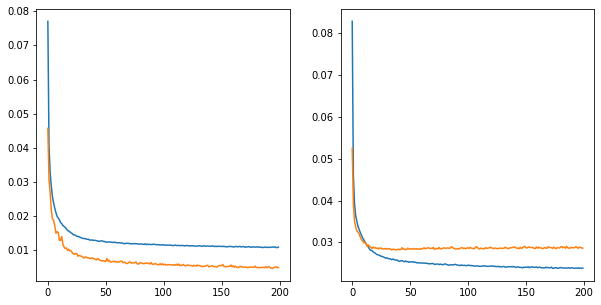

In [117]:
f,axes=plt.subplots(1,2,figsize=(10,5))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])

axes[1].plot(history_2.history['loss'])
axes[1].plot(history_2.history['val_loss'])

In [2]:
x_train_ae = model.predict(x_train)

NameError: name 'model' is not defined